Necessary imports

In [1]:
from fastMONAI.vision_all import *

from monai.apps import DecathlonDataset
from sklearn.model_selection import train_test_split
import pandas as pd

C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


Setting path (and create data directory) and loading data using fastMonai compatabilty with the Medical Decathlon Segmentation datasets.

In [2]:
path = Path('..\data')
path.mkdir(exist_ok=True)

In [3]:
HippocampusSet = DecathlonDataset(root_dir=path, task="Task04_Hippocampus", section="training", download=False,
                                 cache_num=0, num_workers=3)

Making dataframe from dataset

In [4]:
df = pd.DataFrame(HippocampusSet.data)


Check structure of df. Df contains path to images and labels in seperate columns.

In [5]:
df.head()

,image,label
0,..\data\Task04_Hippocampus\imagesTr\hippocampus_172.nii.gz,..\data\Task04_Hippocampus\labelsTr\hippocampus_172.nii.gz
1,..\data\Task04_Hippocampus\imagesTr\hippocampus_223.nii.gz,..\data\Task04_Hippocampus\labelsTr\hippocampus_223.nii.gz
2,..\data\Task04_Hippocampus\imagesTr\hippocampus_001.nii.gz,..\data\Task04_Hippocampus\labelsTr\hippocampus_001.nii.gz
3,..\data\Task04_Hippocampus\imagesTr\hippocampus_004.nii.gz,..\data\Task04_Hippocampus\labelsTr\hippocampus_004.nii.gz
4,..\data\Task04_Hippocampus\imagesTr\hippocampus_268.nii.gz,..\data\Task04_Hippocampus\labelsTr\hippocampus_268.nii.gz


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   208 non-null    object
 1   label   208 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


Making a MedDataSet instance for the set. Useful to check size of images and voxel spacing.

In [7]:
med_dataset = MedDataset(img_list=df.label.tolist()[:20], dtype=MedMask, max_workers=12)

In [8]:
med_dataset.df.head()

,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_0,voxel_count_1,voxel_count_2
0,..\data\Task04_Hippocampus\labelsTr\hippocampus_172.nii.gz,34,56,31,1.0,1.0,1.0,RAS+,55101,1981,1942
1,..\data\Task04_Hippocampus\labelsTr\hippocampus_223.nii.gz,35,52,37,1.0,1.0,1.0,RAS+,63838,1577,1925
2,..\data\Task04_Hippocampus\labelsTr\hippocampus_001.nii.gz,35,51,35,1.0,1.0,1.0,RAS+,59527,1324,1624
3,..\data\Task04_Hippocampus\labelsTr\hippocampus_004.nii.gz,36,52,38,1.0,1.0,1.0,RAS+,67438,1832,1866
4,..\data\Task04_Hippocampus\labelsTr\hippocampus_268.nii.gz,34,51,37,1.0,1.0,1.0,RAS+,61104,1437,1617


In [9]:
summary_df = med_dataset.summary()

In [10]:
summary_df

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
0,33,49,40,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_181.nii.gz,1
1,33,52,27,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_099.nii.gz,1
18,38,54,30,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_328.nii.gz,1
17,38,51,37,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_264.nii.gz,1
16,38,51,31,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_197.nii.gz,1
15,37,56,36,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_238.nii.gz,1
14,37,54,36,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_188.nii.gz,1
13,37,48,36,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_228.nii.gz,1
12,36,52,38,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_004.nii.gz,1
11,36,40,43,1.0,1.0,1.0,RAS+,..\data\Task04_Hippocampus\labelsTr\hippocampus_068.nii.gz,1


Used the fastMonai suggestion for resampling the data with the most common voxel value in each dimension if the the data needs to be reoriented.

In [11]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([1.0, 1.0, 1.0], False)

In [12]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[40.0, 56.0, 43.0]

Quite regular transformations except on thing. The "PadOrCrop" size is not based solely for the purpose of training on this dataset. This model will later be used on the "Task2_Heart" data, its therefore beneficial to have the same size afterwards. This means the images are padded to a size which doesn't exclude the masks/labels in the heart set. Originally i wanted to "squish" the image, but could not figure it out. This is unfortunate, as the padding is quite large. Defintely one of the first changes to be made.

In [13]:
item_tfms = [ZNormalization(), PadOrCrop([160, 160, 128]), RandomAffine(scales=0, degrees=5, isotropic=True)] 

Creating the datablock

In [14]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), MedMaskBlock), 
                      splitter=RandomSplitter(seed=42),
                      get_x=ColReader('image'),
                      get_y=ColReader('label'),
                      item_tfms=item_tfms,
                      batch_tfms=None,
                      reorder=reorder,
                      resample=resample)

In [15]:
bs=2
dls = dblock.dataloaders(df, bs=bs)

Show batch (size=2)

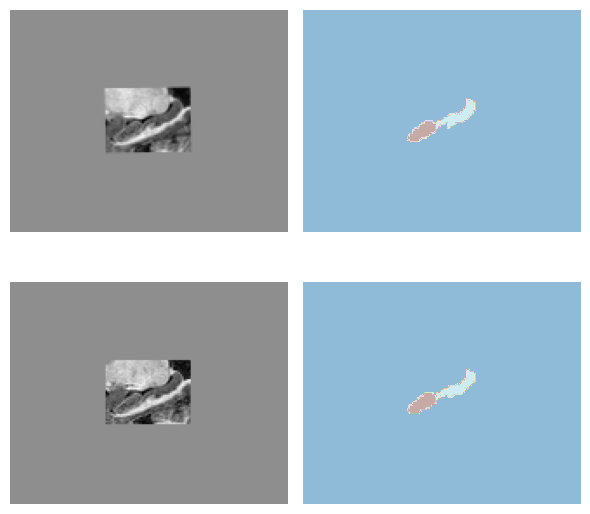

In [16]:
dls.show_batch(anatomical_plane=0, unique=True)

Dataloader automatically sets aside validation set.

In [17]:
len(dls.train_ds.items), len(dls.valid_ds.items)

(167, 41)

Dice loss: We utilize it to evaluate the similarity between our predictions and the ground truth in segmentation tasks. Lower values indicate that the prediction mask is closer to the truth. Lower values -> higher performance.

In [18]:
from monai.networks.nets import UNet
from monai.losses import DiceCELoss

In [19]:
codes = np.unique(med_img_reader(df.label.tolist()[0]))
n_classes = len(codes)

There are there labels/classes, represented by 0, 1 and 2

In [20]:
codes, n_classes

(array([0., 1., 2.], dtype=float32), 3)

In [21]:
model = UNet(dimensions=3, in_channels=1, out_channels=n_classes, 
             channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), 
             num_res_units=2)

C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\monai\utils\deprecate_utils.py:219: FutureWarning: monai.networks.nets.unet UNet.__init__:dimensions: Argument `dimensions` has been deprecated since version 0.6. Please use `spatial_dims` instead.
  warn_deprecated(argname, msg, warning_category)


Creating the loss function which our model will use to update weights during training. The function considers both Dice loss  and cross-entropy loss (difference between predicted and actual class distributions). Lower values indicate better performance, with predictions more closely resembling the ground truth, while higher values signify poorer performance and larger discrepancies between predictions and ground truth. This is good way to do it especially when the background size varies.

In [22]:
loss_func = CustomLoss(loss_func=DiceCELoss(to_onehot_y=True, include_background=True, softmax=True))

Creating the learner

In [23]:
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=multi_dice_score)

The learning rate finder included in the fastai library visualizes the relationship between learning rate and loss for a learner, aiming to minimize the guesswork involved in selecting an optimal initial learning rate. 

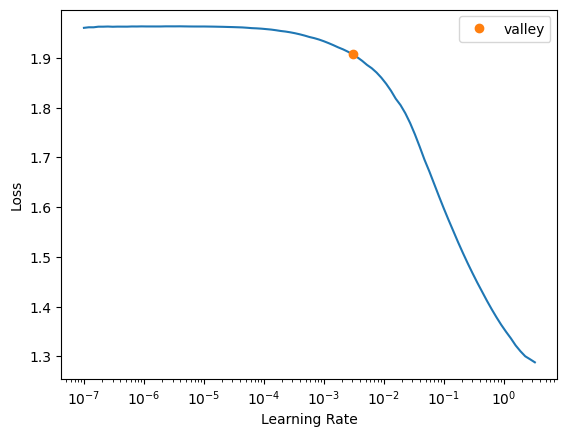

In [24]:
lr = learn.lr_find()

Setting up baseline models with 5 epochs. Any model named "baseline_xxx_model.pkl" has been trained for 4 or 5 epochs.

In [25]:
epochs = 5

Trains the model with 5 epochs and the learning rate found above.

In [26]:
learn.fit_flat_cos(epochs, lr)

epoch,train_loss,valid_loss,multi_dice_score,time
0,1.237940,0.821715,"tensor([0.0193, 0.0095])",00:41
1,0.755419,0.587881,"tensor([0.3196, 0.5016])",00:32
2,0.400640,0.199029,"tensor([0.7737, 0.7739])",00:32
3,0.195622,0.127723,"tensor([0.8320, 0.8268])",00:32
4,0.133045,0.115408,"tensor([0.8448, 0.8406])",00:33


Save model and look at some of the results.

In [27]:
learn.save('baseline.Hippocampus-model')

Path('models/baseline.Hippocampus-model.pth')

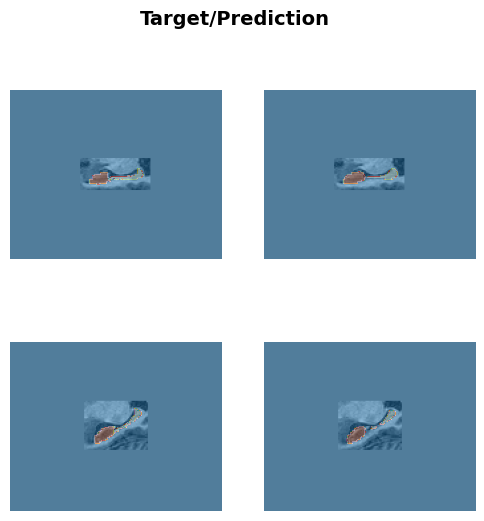

In [28]:
learn.show_results(anatomical_plane=0, ds_idx=1)

In [29]:
test_dl = learn.dls.test_dl(df,with_labels=True)

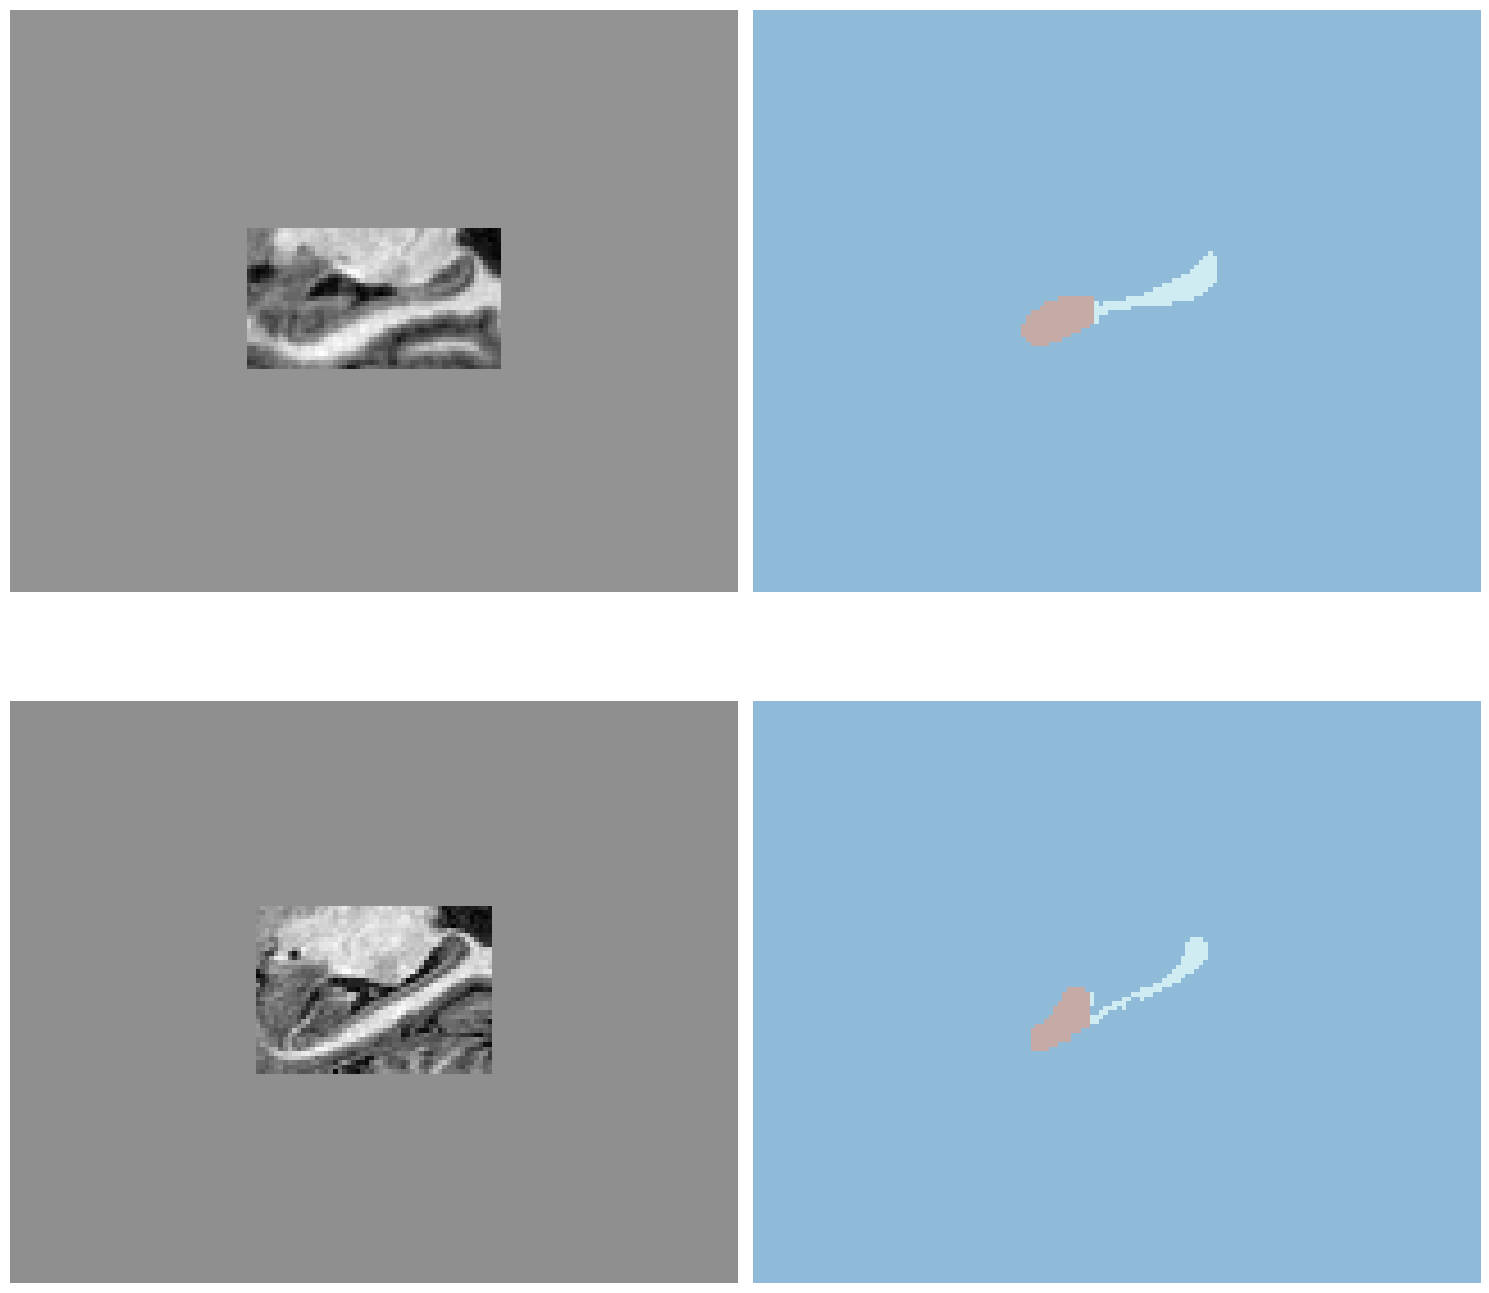

In [30]:
test_dl.show_batch(anatomical_plane=0, figsize=(15,15))

In [31]:
pred_acts, labels = learn.get_preds(dl=test_dl)
pred_acts.shape, labels.shape

(torch.Size([208, 3, 160, 160, 128]), torch.Size([208, 1, 160, 160, 128]))

In [32]:
multi_dice_score(pred_acts, labels)

RuntimeError: [enforce fail at C:\cb\pytorch_1000000000000\work\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 5452595200 bytes.

Shows another result. From the data put aside by the dataloader.

In [ ]:
learn.show_results(anatomical_plane=0, dl=test_dl, ds_idx=19)

Pickles the model for later use.

In [ ]:
learn.export('baseline_Hippocampus_model.pkl')